In [2]:
from scipy.signal import lfilter
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# lftab = freqeuncy table / ldtab = input time history / dr = damping ratio / dtime = integration time step(default = 1/(20*fmax))
# it = input type (0=displacement / 1=acceleration)
# output list
# - displacement(relative to base excitation)
# - velocity    (relative to base excitation)
# - acceleration
# - pseudo velocity
# - pseudo acceleration
def resp_sw(lftab,ldtab,dr,dtime,it):
    
    freq = lftab; th = ldtab; zeta = dr; dt = dtime;
    umax,vmax,acmax,pvmax,pamax = np.zeros(len(freq)),np.zeros(len(freq)),np.zeros(len(freq)),np.zeros(len(freq)),np.zeros(len(freq));
    u,v,acc = np.zeros(len(th)),np.zeros(len(th)),np.zeros(len(th));
    ru,rv,racc = np.zeros(len(th)),np.zeros(len(th)),np.zeros(len(th));
    
    def a_coeff(omega,zeta,dt): 
        ac=np.zeros(3);    
        ac[0]=1;
        omegad=omega*np.sqrt(1.-(zeta**2));        
        E=np.exp(-zeta*omega*dt);
        K=omegad*dt;
        C=E*np.cos(K);
        ac[1]=-2*C;
        ac[2]=+E**2    
        return ac;
     
    bc=np.zeros(3);
        
    for j in range(0,len(freq)): 
        omega=2.*np.pi*freq[j]
        omegad=omega*np.sqrt(1.-(zeta**2))
            
        E=np.exp(-zeta*omega*dt)
        K=omegad*dt
        C=E*np.cos(K)
        S=E*np.sin(K)
        Sp=S/K

        bc[0]=1.-Sp
        bc[1]=2.*(Sp-C)
        bc[2]=E**2-Sp
                        
        ac=a_coeff(omega,zeta,dt);

        acc=lfilter(bc, ac, th, axis=-1, zi=None);
        
        acmax[j]= max(abs(acc));
            
    return freq, acc, acmax;     

In [19]:
## Sample Time history
lftab = np.linspace(0,1000,1001)/10; dt = 1/(20*max(lftab));
t = np.arange(10001)*dt;
gth = 10*np.sin(2*np.pi*t) + 13*np.sin(2*np.pi*3*t+np.pi/1.3) + 17*np.sin(2*np.pi*5*t+np.pi/1.7);

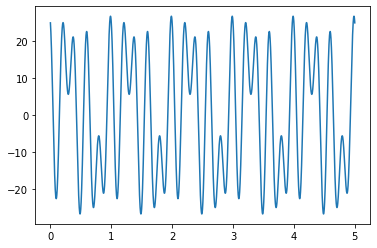

In [20]:
plt.plot(t,gth);

In [21]:
freq, acc, acmax = resp_sw(lftab,gth,0.01,dt,1);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


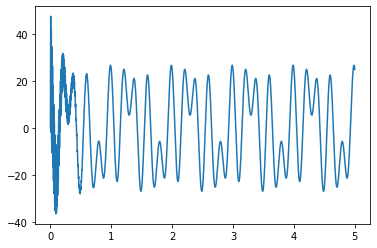

In [22]:
plt.plot(t,acc);

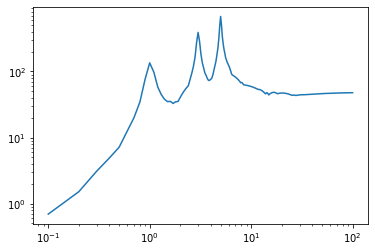

In [23]:
plt.plot(freq,acmax); plt.xscale('log'); plt.yscale('log');

In [ ]:
freq,umax,vmax,acmax,pvmax,pamax = resp_sw(lftab,gth,0.00,dt,1);

In [15]:
damp = 0.02; Q = 1/(2*damp);
f1 = 1.0; # starting freq.
oct=1./6.; # 1/3 or 1/6 or 1/12

nt=int(0.8*(1/f1)/dt);

fn =[];

fn.append(f1)    
    for j in range(1,999):
        fn.append(self.fn[j-1]*(2.**oct))
        if  fn[j] > sr/8.:
            break
        num_fn=j
        
        fff=fn

        temp=fff[0:num_fn]
        del(fff)
        fn=temp
        del(temp)


pos,neg = accel_SRS(num_fn,fn,damp,dt)

NameError: name 'b' is not defined

In [ ]:
from tompy import read_two_columns_from_dialog
from tompy import signal_stats,sample_rate_check
from tompy import GetInteger2,GetInteger3,WriteData3
from tompy import enter_damping
from tompy import enter_float
from tompy import time_history_plot
from tompy import srs_plot_pn

from scipy.signal import lfilter
from numpy import zeros,concatenate
from math import pi,exp,sqrt,cos,sin

import matplotlib.pyplot as plt



class SRS:

    def __init__(self,b,dt,sr):
    
        self.b = b
        self.b_old=b
        self.fn=[]
        self.num_fn=0
        self.damp=0
        self.dt=dt
        self.sr=sr
        
        self.iacc=0
        self.ipv=0
        self.ird=0
  
  
    @classmethod
    def srs_parameters(cls,self):
        print(" ")

        self.damp,Q= enter_damping()

        print(" ")
        print(" Enter starting frequency (Hz) ")        
        f1 = enter_float()

        print(" ")
        print(" Select octave spacing")
        print("   1= one-third")
        print("   2= one-sixth")
        print("   3= one-twelfth")

        noct=GetInteger3()
        
        if(noct==1):
            oct=1./3.
        if(noct==2):
            oct=1./6.
        if(noct==3):
            oct=1./12.
    
        print(" ")        
        print("  include residual:  1=yes 2=no ")

        ires = GetInteger2()
                        
        print(" ")
        print(" Select output metrics")
        print(" ")
        print("  acceleration:  1=yes 2=no ")

        self.iacc = GetInteger2()
        
        print(" ")        
        print("  pseudo velocity:  1=yes 2=no ")

        self.ipv = GetInteger2()

        print(" ")        
        print("  relative displacement:  1=yes 2=no ")

        self.ird = GetInteger2()

#*******************************************************************************

        nt=int(0.8*(1/f1)/dt)

        if(ires==1):
            tz=zeros(nt)
            d=concatenate((self.b,tz))
            self.b=d
#*******************************************************************************

        self.fn.append(f1)    
        for j in range(1,999):
            self.fn.append(self.fn[j-1]*(2.**oct))
            if  self.fn[j] > self.sr/8.:
                break

        self.num_fn=j
        
        fff=self.fn

        temp=fff[0:self.num_fn]
        del(fff)
        self.fn=temp
        del(temp)
        
  
    @classmethod     
    def a_coeff(cls,omega,damp,dt): 
        ac=zeros(3)    
        ac[0]=1   
        omegad=omega*sqrt(1.-(damp**2))        
        E=exp(-damp*omega*dt)
        K=omegad*dt
        C=E*cos(K)
        ac[1]=-2*C
        ac[2]=+E**2    
        
        return ac


    def srs_plots(self):
        
        SRS.srs_parameters(self)
                
        pv_pos=zeros(self.num_fn)
        pv_neg=zeros(self.num_fn)
        rd_pos=zeros(self.num_fn)
        rd_neg=zeros(self.num_fn)

        if(self.iacc==1):

            print (" ")
            print (" fn(Hz)  Positive Accel(G)  Negative Accel(G) ")

            x_pos,x_neg=SRS.accel_SRS(self)

        for j in range(0,self.num_fn):
            print ("%6.4g  %6.4g  %6.4g" % (self.fn[j],x_pos[j],x_neg[j]))
        

        if(self.ipv==1 or self.ird==1):
        
            rd_pos,rd_neg=SRS.rel_disp_SRS(self)        
#    
#*******************************************************************************
#
#   Pseudo Velocity
#
        if(self.ipv==1):
            for j in range(0,self.num_fn):
                omega=2.*pi*self.fn[j]
                pv_pos[j]=rd_pos[j]*omega
                pv_neg[j]=rd_neg[j]*omega   

#*******************************************************************************

        print(" ")        
        print("  Export data files:  1=yes 2=no ")

        idf = GetInteger2()
        
        if(idf==1):
    
            print (" ")
            print (" Find output dialog box") 

            if(self.iacc==1):
                root = tk.Tk() ; root.withdraw()
                output_file_path = asksaveasfilename(parent=root,title="Save the acceleration SRS as...")           
                output_file = output_file_path.rstrip('\n')
                WriteData3(self.num_fn,self.fn,x_pos,x_neg,output_file)

            if(self.ipv==1):    
                root = tk.Tk() ; root.withdraw()
                output_file_path = asksaveasfilename(parent=root,title="Save the pseudo velocity SRS as...")
                output_file = output_file_path.rstrip('\n')
                WriteData3(self.num_fn,self.fn,pv_pos,pv_neg,output_file)

            if(self.ird==1):
                root = tk.Tk() ; root.withdraw()
                output_file_path = asksaveasfilename(parent=root,title="Save the relative displacement SRS as...")
                output_file = output_file_path.rstrip('\n')
                WriteData3(self.num_fn,self.fn,rd_pos,rd_neg,output_file)

#*******************************************************************************

        print (" ")
        print (" begin plots ")
        print (" ")

        time_history_plot(a,self.b_old,1,'Time(sec)','Accel(G)','Base Input','time_history')

#*******************************************************************************

        if(self.iacc==1):    
            plt.figure(2)
            srs_plot_pn(1,1,self.fn,x_pos,x_neg,self.damp,'accel_srs_plot')  

#*******************************************************************************

        if(self.ipv==1):
            plt.figure(3)
            srs_plot_pn(2,1,self.fn,pv_pos,pv_neg,self.damp,'pv_srs_plot')     

#*******************************************************************************

        if(self.ird==1):
            plt.figure(4)
            srs_plot_pn(3,1,self.fn,rd_pos,rd_neg,self.damp,'rd_srs_plot')  

#*******************************************************************************

        plt.show()        
        
        
    def accel_SRS(self):
        
        pos=zeros(self.num_fn)
        neg=zeros(self.num_fn)
        bc=zeros(3)
        
        
        for j in range(0,self.num_fn):
            
            omega=2.*pi*self.fn[j]
            omegad=omega*sqrt(1.-(self.damp**2))
#
#  bc coefficients are applied to the excitation
            
            E=exp(-self.damp*omega*self.dt)
            K=omegad*self.dt
            C=E*cos(K)
            S=E*sin(K)
            Sp=S/K

            bc[0]=1.-Sp
            bc[1]=2.*(Sp-C)
            bc[2]=E**2-Sp
                        
            ac=SRS.a_coeff(omega,self.damp,self.dt)

      
            resp=lfilter(bc, ac, self.b, axis=-1, zi=None)            
#
            pos[j]= max(resp)
            neg[j]= abs(min(resp))    
            
        return pos,neg
        
    def rel_disp_SRS(self):
        
        rd_pos=zeros(self.num_fn)
        rd_neg=zeros(self.num_fn)
        ac=zeros(3)
        bc=zeros(3)
        
        for j in range(0,self.num_fn):
            
            omega=2.*pi*self.fn[j]
            omegad=omega*sqrt(1.-(self.damp**2))            
            
            E =exp(  -self.damp*omega*self.dt)
            E2=exp(-2*self.damp*omega*self.dt)
             
            K=omegad*self.dt
            C=E*cos(K)
            S=E*sin(K)
            
            Omr=(omega/omegad)
            Omt=omega*self.dt
            
            P=2*self.damp**2-1
            
            b00=2*self.damp*(C-1)
            b01=S*Omr*P
            b02=Omt
            
            b10=-2*Omt*C
            b11= 2*self.damp*(1-E2)
            b12=-2*b01   

            b20=(2*self.damp+Omt)*E2
            b21= b01
            b22=-2*self.damp*C               
            
            bc[0]=b00+b01+b02
            bc[1]=b10+b11+b12
            bc[2]=b20+b21+b22
            
            bc=-bc/(omega**3*self.dt)
                        
            ac=SRS.a_coeff(omega,self.damp,self.dt)
            
            resp=lfilter(bc, ac, self.b, axis=-1, zi=None)

            rd_pos[j]= 386*max(resp)
            rd_neg[j]= 386*abs(min(resp))   
            
        return rd_pos,rd_neg            

########################################################################  

class READ_DATA:

    def __init__(self):
        pass

    @classmethod     
    def check_data(cls,a,b,num,sr,dt):

        sample_rate_check(a,b,num,sr,dt)
        
        return sr,dt
        
    def read_and_stats(self): 
 
        label="Enter the base acceleration time history..." 
 
        a,b,num =read_two_columns_from_dialog(label)

        sr,dt,ave,sd,rms,skew,kurtosis,dur=signal_stats(a,b,num)

        sr,dt=READ_DATA.check_data(a,b,num,sr,dt)

        return a,b,num,sr,dt,dur

#######################################################################


print(" ")     

print (" ") 
print ("SRS using the Smallwood ramp invariant digital recursive")
print ("filtering relationship")
print (" ")
     
print ("The file must have two columns:")
print (" time(sec) & accel(G)")

a,b,num,sr,dt,dur=READ_DATA().read_and_stats()

SRS(b,dt,sr).srs_plots()